In [1]:
pip install pandas numpy matplotlib statsmodels scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [5]:
# Load dataset
df = pd.read_csv("C:/Users/bhrug/OneDrive/Desktop/ABA/AirPassengers.csv")
df.columns = ['Month', 'Passengers']
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)


In [7]:
# Train-Test Split
train = df[:'1959']
test = df['1960':]

In [9]:
exp_model = ExponentialSmoothing(train['Passengers'], trend='add', seasonal='add', seasonal_periods=12)
exp_fit = exp_model.fit()
exp_forecast = exp_fit.forecast(len(test))

C:\Users\bhrug\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [11]:
arima_model = ARIMA(train['Passengers'], order=(2,1,2))
arima_fit = arima_model.fit()
arima_forecast = arima_fit.forecast(len(test))

C:\Users\bhrug\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\bhrug\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\bhrug\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [13]:
def evaluate_model(true, predicted, model_name):
    mae = mean_absolute_error(true, predicted)
    rmse = math.sqrt(mean_squared_error(true, predicted))
    print(f"{model_name} -> MAE: {mae:.2f}, RMSE: {rmse:.2f}")

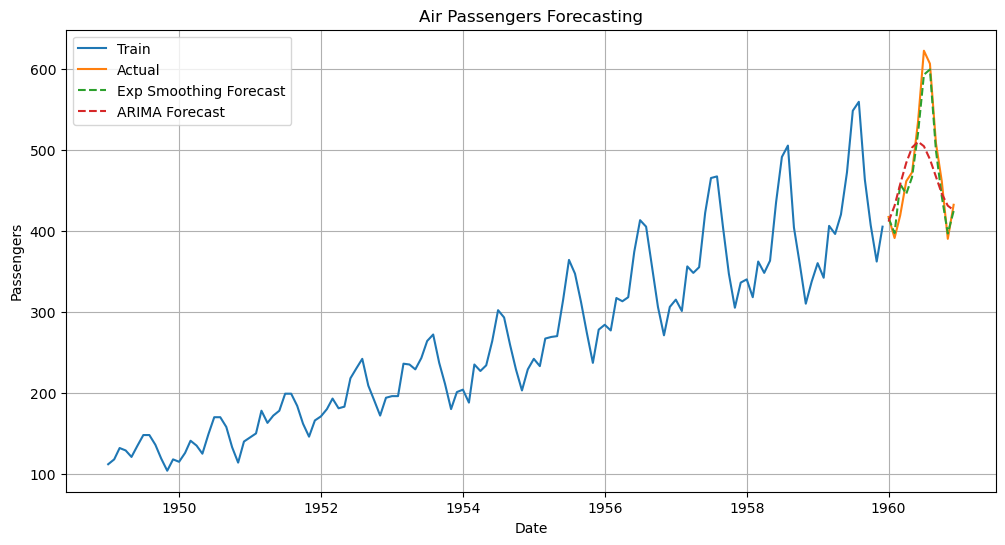

In [15]:
plt.figure(figsize=(12,6))
plt.plot(train.index, train['Passengers'], label='Train')
plt.plot(test.index, test['Passengers'], label='Actual')
plt.plot(test.index, exp_forecast, label='Exp Smoothing Forecast', linestyle='--')
plt.plot(test.index, arima_forecast, label='ARIMA Forecast', linestyle='--')
plt.title("Air Passengers Forecasting")
plt.xlabel("Date")
plt.ylabel("Passengers")
plt.legend()
plt.grid()
plt.show()
